In [57]:
from torchvision import transforms,datasets
from torch.utils.data.dataset import Dataset
import torch

In [58]:
import PIL
import numpy as np

In [59]:
import subprocess

In [113]:
class SFBD(Dataset):
    def __init__(self,image_path,label_path,transform=None): #path to image folder of sfbd
        self.image_path = image_path
        self.label_path = label_path
        temp = subprocess.getoutput("ls "+image_path)
        temp = temp.split("\n")
        self.file_list = temp
        self.len_files = len(self.file_list)
        self.labels = subprocess.getoutput("ls "+label_path).split('\n')
#         self.transform = transform
    
    def __len__(self):
        return self.len_files
    
    def open_file(path):
        """
            Takes a a text labels path and returns an text file object
        """
        txt = open(path,'r')
        y = txt.read()
        return y
    
    def numpify(txt):
        """
            Takes a text object lable and returns an numpy array of it
        """
        img = []
        l = txt.split('\n')
        for i in l:
            k = i.split(' ')
            temp = []
            for j in k:
                temp.append(j)
            if temp != ['']:
                img.append(temp)
    #     print(len(img))
    #     print(len(img[0]))
        return np.array(img,dtype='uint8')

    def one_hot_encodify(labels_mat):
        """
            Takes an 240*320 numpy array of labels and returns an one hot encoding array of dimension 8*240*320
        """
        cl = np.zeros((8,240,320))
        classes = [i for i in range(8)]
        for i in classes:
            h = np.reshape(labels_mat,(240*320))
            p = np.zeros((240*320))
            for j in range(len(h)):
                if h[j] == i:
                      p[j] = 1
            cl[i] = np.reshape(p,(240,320))
        return cl
        
    
    def __getitem__(self,index):
        label = SFBD.one_hot_encodify(SFBD.numpify(SFBD.open_file(self.label_path + self.labels[index])))
        return {'image':np.array(PIL.Image.open(self.image_path + self.file_list[index])),'label':label}
#         return self.file_list[index]

In [114]:
sf = SFBD(image_path="iccv09Data/images/",label_path="iccv09Data/labels/")

In [115]:
len(sf)

715

In [116]:
len(sf.labels)

715

In [130]:
sf[4]

{'image': array([[[237, 241, 240],
         [238, 242, 241],
         [241, 245, 244],
         ..., 
         [252, 252, 252],
         [252, 252, 252],
         [252, 252, 252]],
 
        [[241, 245, 244],
         [242, 246, 245],
         [245, 249, 248],
         ..., 
         [252, 252, 252],
         [252, 252, 252],
         [252, 252, 252]],
 
        [[243, 245, 244],
         [243, 245, 244],
         [245, 247, 246],
         ..., 
         [252, 252, 252],
         [252, 252, 252],
         [252, 252, 252]],
 
        ..., 
        [[ 73,  90, 106],
         [ 73,  90, 106],
         [ 74,  91, 107],
         ..., 
         [ 89, 111, 134],
         [ 87, 109, 132],
         [ 85, 107, 130]],
 
        [[ 73,  90, 106],
         [ 74,  91, 107],
         [ 74,  91, 107],
         ..., 
         [ 85, 107, 130],
         [ 84, 106, 129],
         [ 83, 105, 128]],
 
        [[ 69,  86, 102],
         [ 69,  86, 102],
         [ 70,  87, 103],
         ..., 
         [ 82,

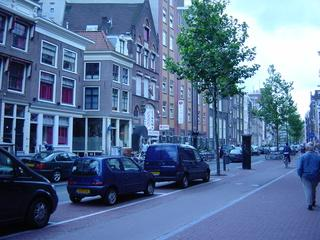

In [119]:
PIL.Image.fromarray(sf[2]['image'])

In [125]:
dataset_loader = torch.utils.data.DataLoader(sf,
                                             batch_size=1, shuffle=False,
                                             num_workers=1)

In [128]:
for i in dataset_loader:
    print(i)

{'label': 
( 0 , 0 ,.,.) = 
   1   1   1  ...    0   0   0
   1   1   1  ...    0   0   0
   1   1   1  ...    0   0   0
     ...       ⋱       ...    
   0   0   0  ...    0   0   0
   0   0   0  ...    0   0   0
   0   0   0  ...    0   0   0

( 0 , 1 ,.,.) = 
   0   0   0  ...    0   0   0
   0   0   0  ...    0   0   0
   0   0   0  ...    0   0   0
     ...       ⋱       ...    
   0   0   0  ...    0   0   0
   0   0   0  ...    0   0   0
   0   0   0  ...    0   0   0

( 0 , 2 ,.,.) = 
   0   0   0  ...    0   0   0
   0   0   0  ...    0   0   0
   0   0   0  ...    0   0   0
     ...       ⋱       ...    
   1   1   1  ...    1   1   1
   1   1   1  ...    1   1   1
   1   1   1  ...    1   1   1
    ... 

( 0 , 5 ,.,.) = 
   0   0   0  ...    1   1   1
   0   0   0  ...    1   1   1
   0   0   0  ...    1   1   1
     ...       ⋱       ...    
   0   0   0  ...    0   0   0
   0   0   0  ...    0   0   0
   0   0   0  ...    0   0   0

( 0 , 6 ,.,.) = 
   0   0   0  ...    0 

ValueError: Traceback (most recent call last):
  File "/usr/local/lib/python3.5/dist-packages/torch/utils/data/dataloader.py", line 40, in _worker_loop
    samples = collate_fn([dataset[i] for i in batch_indices])
  File "/usr/local/lib/python3.5/dist-packages/torch/utils/data/dataloader.py", line 40, in <listcomp>
    samples = collate_fn([dataset[i] for i in batch_indices])
  File "<ipython-input-113-260340424367>", line 57, in __getitem__
    label = SFBD.one_hot_encodify(SFBD.numpify(SFBD.open_file(self.label_path + self.labels[index])))
  File "<ipython-input-113-260340424367>", line 47, in one_hot_encodify
    h = np.reshape(labels_mat,(240*320))
  File "/usr/local/lib/python3.5/dist-packages/numpy/core/fromnumeric.py", line 232, in reshape
    return _wrapfunc(a, 'reshape', newshape, order=order)
  File "/usr/local/lib/python3.5/dist-packages/numpy/core/fromnumeric.py", line 57, in _wrapfunc
    return getattr(obj, method)(*args, **kwds)
ValueError: cannot reshape array of size 68480 into shape (76800,)
